# Medical Cost Prediction
      

In [1]:
#The aim of the analysis to predict patient information .
#the dataset contain 1338 observations and 7 variables.

In [2]:
#Variable and Discription
#Age: age of primary beneficiary
#sex :male or female
#bmi: number of childrens covered by health insurance.
#smoker: smoking
#region:the beneficary's residentaional area in the US
#Changes:Individual medical costs billed by health insurance

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("D:/Datasets/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Preprocessing

In [5]:
#number of rows and columns.
df.shape

(1338, 7)

In [6]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#checking discriptive statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#values counts for categorical variables
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [11]:
#Replacing the categorical variables with numerical values
#sex:1-male,0-female
#smoker:1-yes,0-no
#region:0-northeast,1-northwest,2-southeast,3-southwest

In [12]:
#changing categorical into numerical
df["sex"] = df["sex"].map({"male":1,"female":0})
df['smoker']= df['smoker'].map({'yes':1,'no':0})
df['region']= df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [13]:
df.head(30)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,1,3756.62160
6,46,0,33.440,1,0,1,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


# Exploratory Data Analysis
visualization is a good way to understand the data,in this section i will plot the distribution of each variable to get an overview about their counts and distributions.


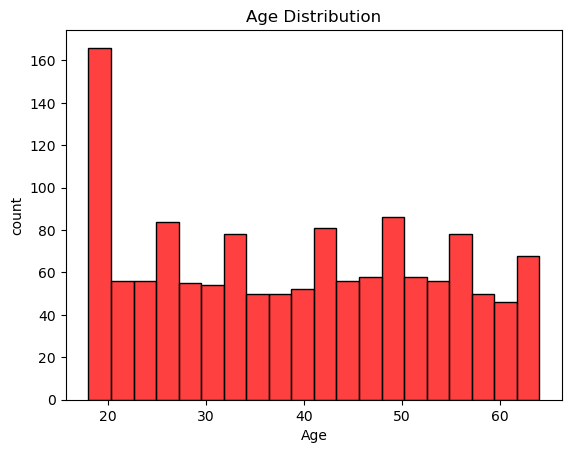

In [14]:
#age distributons
sns.histplot(df.age,bins=20,kde=False,color='red')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

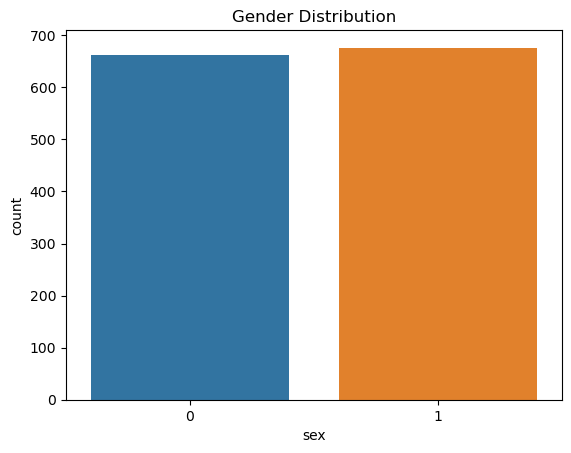

In [15]:
#gender plot
sns.countplot(x="sex", data = df)
plt.title("Gender Distribution")

In [16]:
#in above distribution it is clear that number of males and females are almost equal.

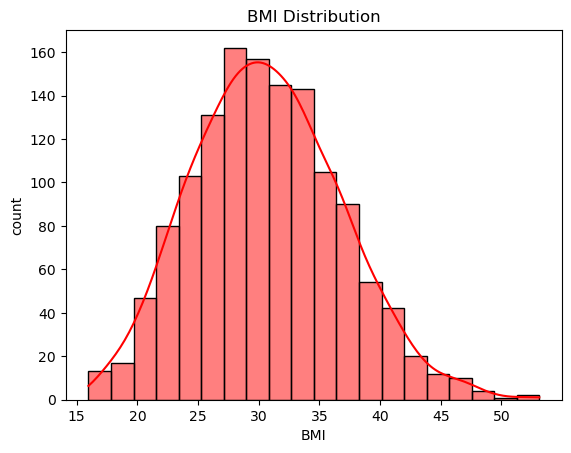

In [17]:
#bmi distribution 
sns.histplot(df.bmi,bins=20,kde=True,color='red')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("count")
plt.show()

In [18]:
#the majority of the patient have BMI between 25 and 40 which is considered as overweight and could be a major factor in increasing medical cost.

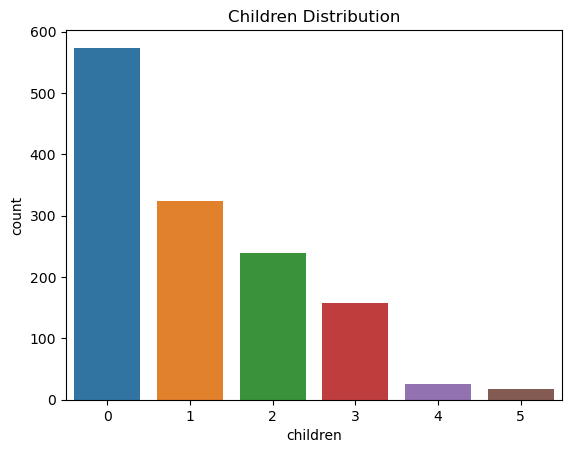

In [19]:
#child count distribution
sns.countplot(x = 'children',data = df)
plt.title("Children Distribution")
plt.xlabel("children")
plt.ylabel("count")
plt.show()

In [20]:
#The graph clearily shows that most of the patients have no children and very few patients have more than 3 children.

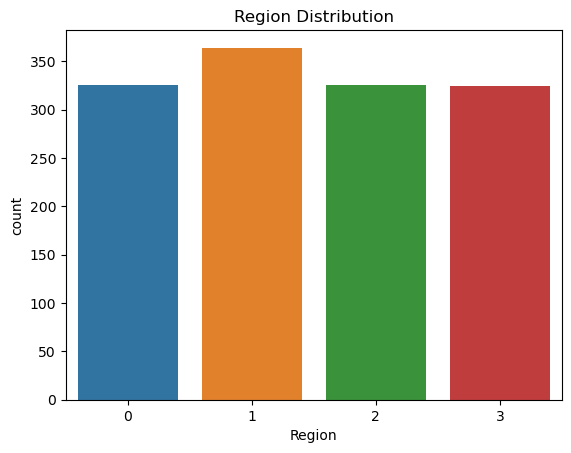

In [21]:
#regionwise plot
sns.countplot(x = 'region',data = df)
plt.title("Region Distribution")
plt.xlabel("Region")
plt.ylabel("count")
plt.show()

In [22]:
#The count of patient from northwest is slightly higher than the other region.other region patient are equal.

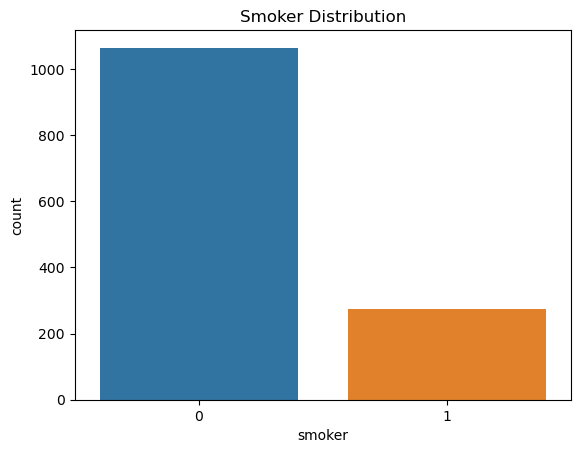

In [23]:
#count of smoker
sns.countplot(x = 'smoker',data = df)
plt.title("Smoker Distribution")
plt.xlabel("smoker")
plt.ylabel("count")
plt.show()

In [24]:
#smokers are very few in dataset 80% of the patient are non-smokers.

<AxesSubplot:xlabel='smoker', ylabel='count'>

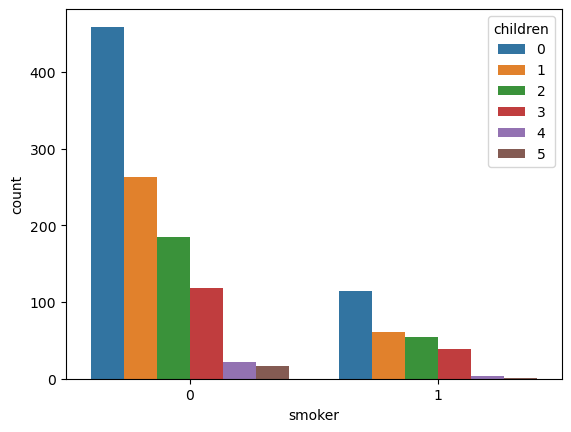

In [25]:
sns.countplot(x = df.smoker,hue = df.children)

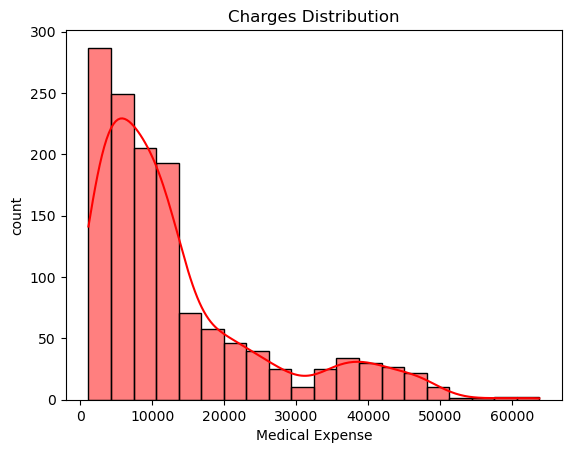

In [26]:
#charges distribution
sns.histplot(df.charges,bins=20,kde=True,color='red')
plt.title("Charges Distribution")
plt.xlabel("Medical Expense")
plt.ylabel("count")
plt.show()

In [27]:
#most of the medical expenses are below 20,000 with negligible number of patients having medical expenses above 50,000

# Coorealation 

In [28]:
#coorelation matrix
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


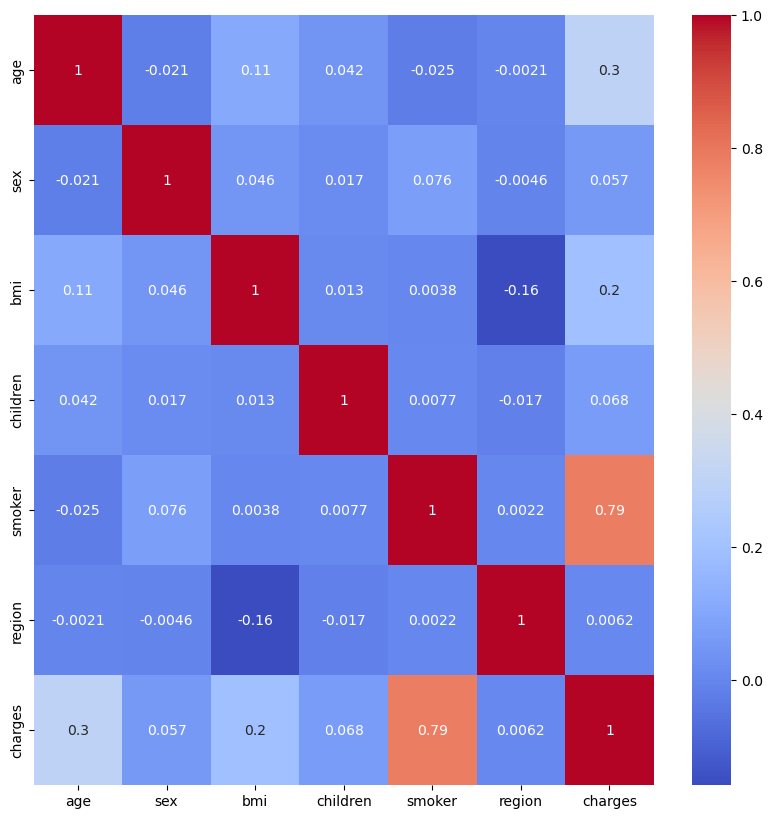

In [29]:
#plotting the coorelation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [30]:
#the variable smoker show a significant cooreation with the medical expense.Now i explore more into patients smoking habbit and their reation with a other factor.

In [31]:
#Plotting the smoker count with patient gender

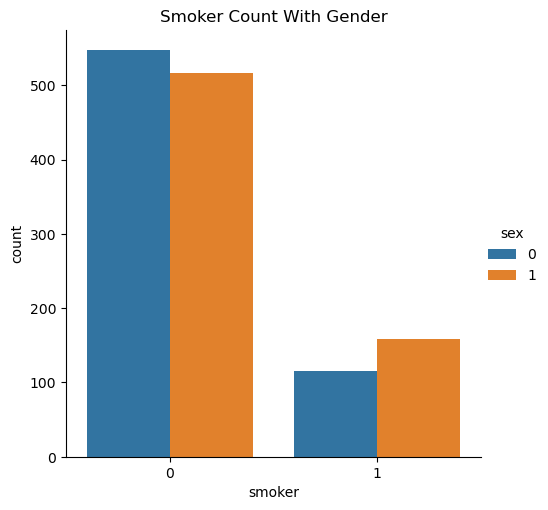

In [32]:
sns.catplot(x="smoker",kind="count",hue = "sex",data=df)
plt.title("Smoker Count With Gender")
plt.xlabel("smoker")
plt.ylabel("count")
plt.show()

In [33]:
#We can notice more male smokers than females.

<AxesSubplot:xlabel='sex', ylabel='charges'>

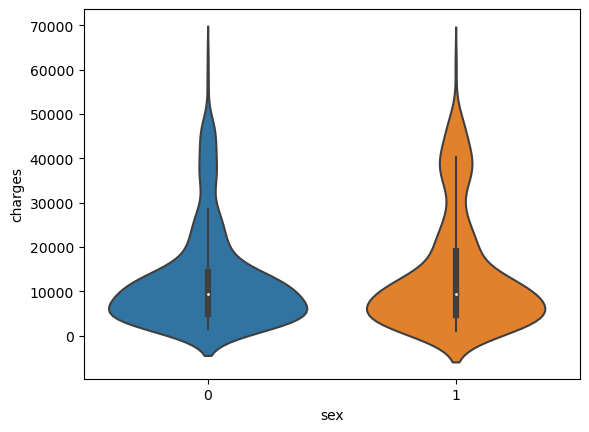

In [34]:
sns.violinplot(x = "sex",y = "charges", data = df)

<AxesSubplot:title={'center':'Box Plot For Charges Of Women'}, xlabel='charges', ylabel='smoker'>

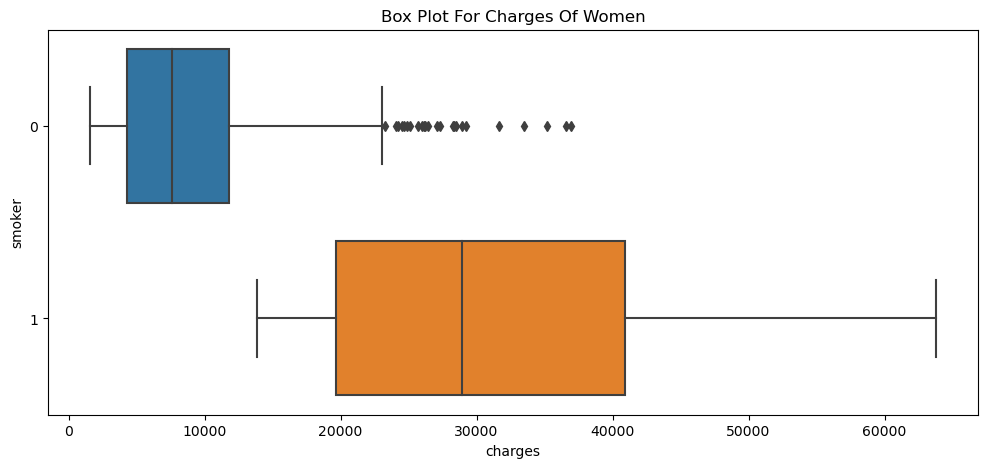

In [35]:
plt.figure(figsize=(12,5))
plt.title("Box Plot For Charges Of Women")
sns.boxplot(y="smoker",x="charges",data=df[df.sex ==0],orient="h")

<AxesSubplot:title={'center':'Box Plot For Charges Of men'}, xlabel='charges', ylabel='smoker'>

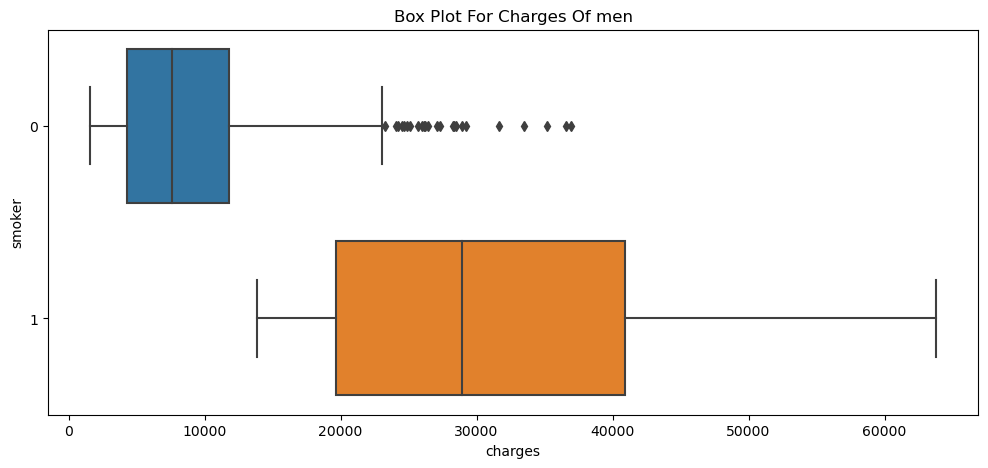

In [36]:
plt.figure(figsize=(12,5))
plt.title("Box Plot For Charges Of men")
sns.boxplot(y="smoker",x="charges",data=df[df.sex ==0],orient="h")

In [37]:
#The assumption is true,the medical expenses of male is greater than females.

# Smokers and age distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


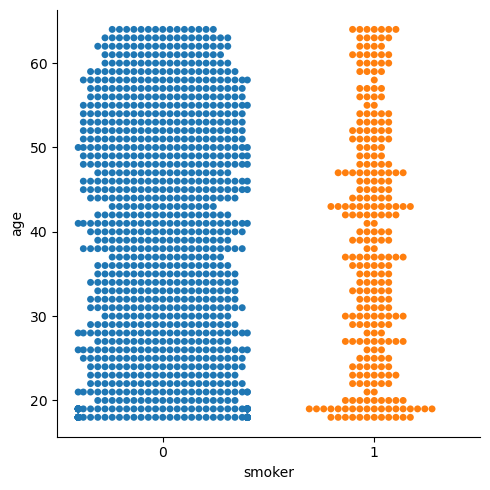

In [38]:
#smokers and age distribution
sns.catplot(x="smoker",y="age",kind="swarm",data=df)

In [39]:
#From the graph ,we can see that there significant number of smokers of age 19.Now i will study the medical exppense of smokers of age 19.

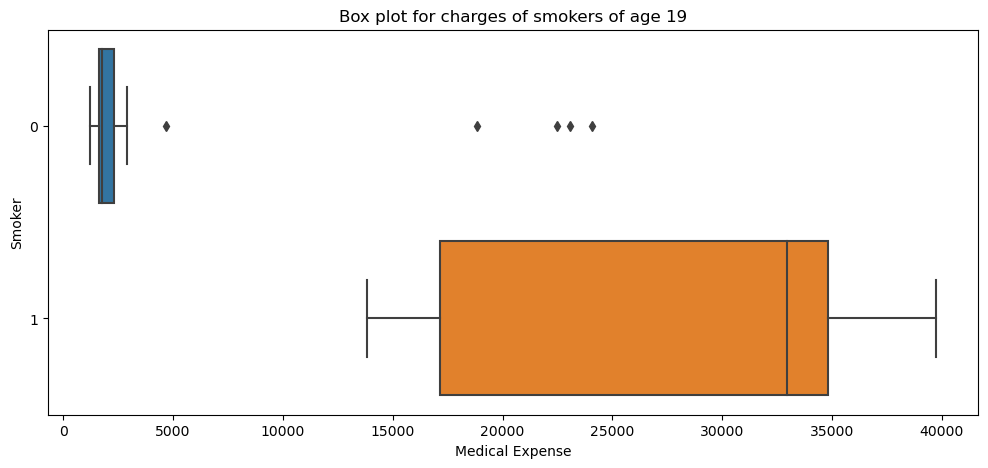

In [72]:
#smokers of age 19
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers of age 19")
sns.boxplot(y="smoker", x="charges",data = df[(df.age ==19)],orient="h")
plt.xlabel("Medical Expense")
plt.ylabel("Smoker")
plt.show()

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Scatterplot for charges of non-smokers of age 19")
sns.scatterplot(x="age",y="charges",data = df[(df.smoker == 0)])
plt.xlabel("Age")
plt.ylabel("Medical Expense")
plt.show()

In [ ]:
#smokers charge distribution
plt.figure(figsize=(7,5))
plt.title("Scatterplot for charges of smokers")
sns.scatterplot(x="age",y="charges",data = df[(df.smoker == 1)])
plt.xlabel("Age")
plt.ylabel("Medical Expense")
plt.show()

In [ ]:
#age charges distribution
sns.lmplot(x="age",y="charges",data = df,hue = "smoker")
plt.xlabel("Age")
plt.ylabel("Medical Expense")
plt.show()

In [ ]:
#Now we clearly understand the varition in changes with respect to age and smoking habits.

# Charges distribution for patients with BMI greater than 30 i.e obse patients.


In [ ]:
#bmi charges distribution for obese patient
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi>30)]["charges"])
plt.title("charges Distribution for obese People")
plt.xlabel("Medical Expense")
plt.show()

# Charges distribution for patients with BMI less than 30 i.e healthy patients

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi<30)]["charges"])
plt.title("charges Distribution for non-obese People")
plt.xlabel("Medical Expense")
plt.show()

In [ ]:
#Therefore,patients with BMI less than 30 are spending less on medical treatment than those with BMI greaterthan30

In [ ]:
#Through EDA ,we have a clear understanding about the data and coorealtion between the variables. Now , i will build the model predict the medical expenses of patients.

# Train Test Split

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('charges',axis=1), df['charges'], test_size=0.2, random_state=0)

# Model Building

# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [45]:
#model training
lr.fit(x_train,y_train)
#model accuracy
lr.score(x_train,y_train)

0.7368306228430945

In [46]:
#model prediction
y_pred=lr.predict(x_test)

# Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree

DecisionTreeRegressor()

In [51]:
#model training
dtree.fit(x_train,y_train)
#model accuracy
dtree.score(x_train,y_train)

0.9982963931606104

In [52]:
#model prediction
dtree_pred = dtree.predict(x_test)

# Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [56]:
#model training
rf.fit(x_train,y_train)
#model accuracy
rf.score(x_train,y_train)

0.9741694992410624

In [57]:
#model prediction
rf_pred = rf.predict(x_test)

# Model Evaluation

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


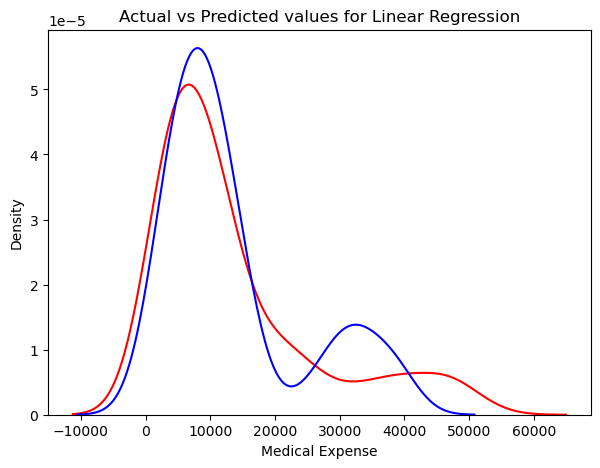

In [60]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score
#distribution of actual vs predict the values
plt.figure(figsize=(7,5))
ax1= sns.distplot(y_test,hist=False,color='r',label="Actual Value")
sns.distplot(y_pred,hist=False,color='b',label="Predicted Value",ax=ax1)
plt.title("Actual vs Predicted values for Linear Regression")
plt.xlabel("Medical Expense")
plt.show()

In [61]:
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score:",r2_score(y_test,y_pred))

MAE: 3930.333273901141
MSE: 31845929.13415944
RMSE: 5643.219748880902
R2 score: 0.7998747145449959


# Decison Tree Regressor

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


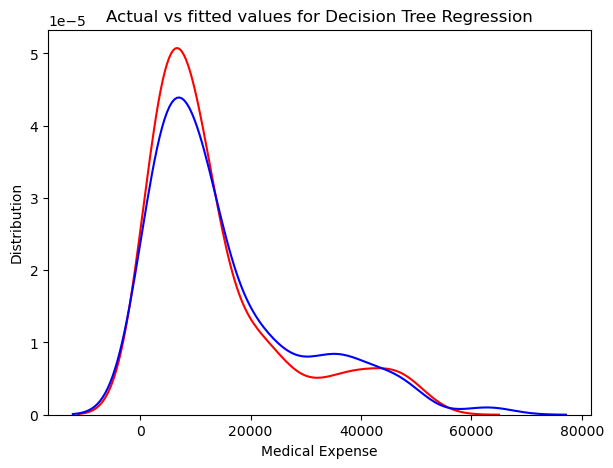

In [63]:
plt.figure(figsize=(7,5))
ax= sns.distplot(y_test,hist=False,color='r',label="Actual Value")
sns.distplot(dtree_pred,hist=False,color='b',label="fitted values",ax=ax)
plt.title("Actual vs fitted values for Decision Tree Regression")
plt.xlabel("Medical Expense")
plt.ylabel("Distribution")
plt.show()

In [65]:
print("MAE:",mean_absolute_error(y_test,dtree_pred))
print("MSE:",mean_squared_error(y_test,dtree_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,dtree_pred)))
print("Accuracy:",dtree.score(x_test,y_test))

MAE: 3475.009943018657
MSE: 51673420.27696107
RMSE: 7188.422655698611
Accuracy: 0.6752753565519047


# Random Forest Regreesor

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


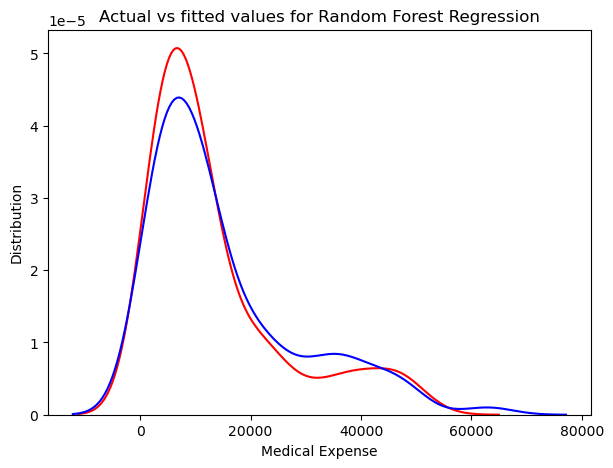

In [66]:
plt.figure(figsize=(7,5))
ax= sns.distplot(y_test,hist=False,color='r',label="Actual Value")
sns.distplot(dtree_pred,hist=False,color='b',label="fitted values",ax=ax)
plt.title("Actual vs fitted values for Random Forest Regression")
plt.xlabel("Medical Expense")
plt.ylabel("Distribution")
plt.show()

In [67]:
print("MAE:",mean_absolute_error(y_test,rf_pred))
print("MSE:",mean_squared_error(y_test,rf_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,rf_pred)))
print("Accuracy:",rf.score(x_test,y_test))

MAE: 2658.7444700464953
MSE: 20076784.96554656
RMSE: 4480.712551095703
Accuracy: 0.87383403683019


# Conclusion

From the above models, we can see that Decision Tree Regressor and Random Forest Regressor are giving the best results. But, Random Forest Regressor is giving the best results with the least RMSE value. Therefore, I will use Random Forest Regressor to predict the medical expense of patients.

Moreover, the medical expense of smokers is higher than that of non-smokers. The medical expense of patients with BMI greater than 30 is higher than that of patients with BMI less than 30. The medical expense of older patients is higher than that of younger patients.

Thus, from the overall analysis, we can conclude that the medical expense of patients depends on their age, BMI, smoking habits
    